# Aprendamos sobre las aves

1. Importamos las lirerias a utilizar y tambien el donjunto de datos a utilizar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('../../data/birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


Empecemos por graficar algunos de los datos numéricos utilizando un gráfico de líneas básico. Supongamos que queremos ver la envergadura máxima de estas interesantes aves.

<Axes: >

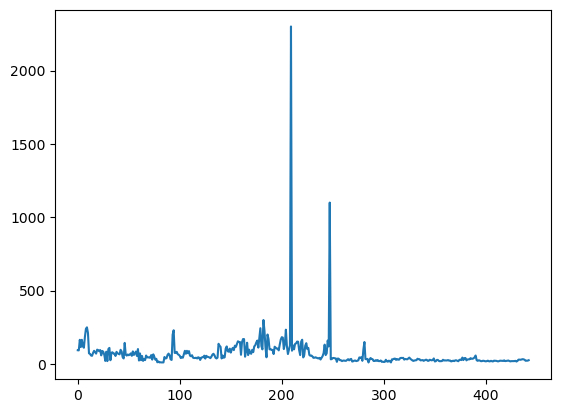

In [2]:
wingspan = birds['MaxWingspan'] 
wingspan.plot()

¿Qué nota inmediatamente? Parece que hay al menos un valor atípico: ¡esa es una gran envergadura! Una envergadura de 2.300 centímetros equivale a 23 metros: ¿hay pterodáctilos vagando por Minnesota? Vamos a investigar.

Aunque podrías hacer una ordenación rápida en Excel para encontrar esos valores atípicos, que probablemente sean errores tipográficos, continúa el proceso de visualización trabajando desde el gráfico.

Añade etiquetas al eje x para mostrar qué tipo de aves hay en cuestión:

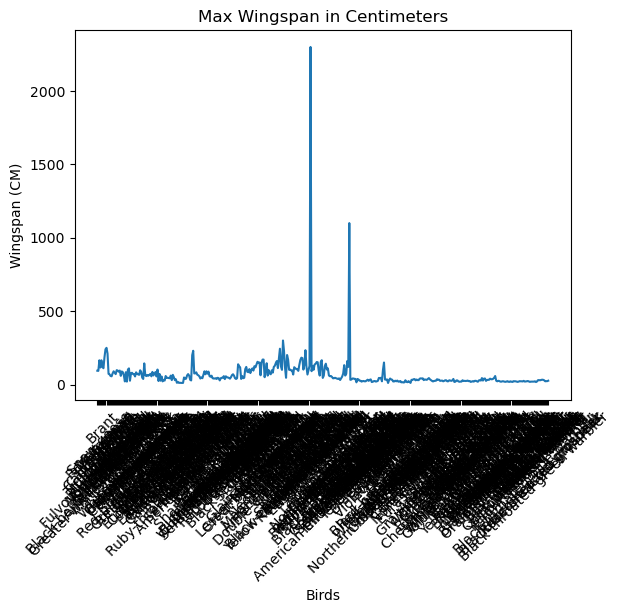

In [3]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.xticks(rotation=45)
x = birds['Name'] 
y = birds['MaxWingspan']

plt.plot(x, y)

plt.show()

Incluso con la rotación de las etiquetas ajustada a 45 grados, hay demasiado para leer. Vamos a probar una estrategia diferente: etiquetar sólo los valores atípicos y poner las etiquetas dentro del gráfico. Puedes utilizar un gráfico de dispersión para tener más espacio para el etiquetado:

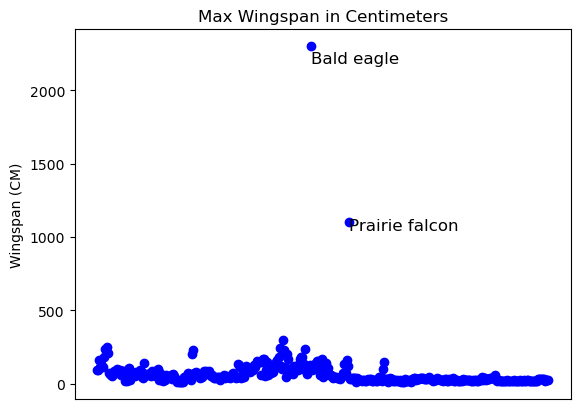

In [4]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    plt.plot(x, y, 'bo')
    if birds['MaxWingspan'][i] > 500:
        plt.text(x, y * (1 - 0.05), birds['Name'][i], fontsize=12)
    
plt.show()

¿Qué está pasando aquí? Has utilizado tick_params para ocultar las etiquetas inferiores y luego has creado un bucle sobre tu conjunto de datos de aves. Al trazar el gráfico con pequeños puntos azules redondos utilizando bo, has comprobado si hay algún pájaro con una envergadura máxima superior a 500 y has mostrado su etiqueta junto al punto si es así. Desplazaste las etiquetas un poco en el eje Y (y * (1 - 0.05)) y utilizaste el nombre del ave como etiqueta.

¿Qué descubrimos?


## Filtra tus datos
Tanto el águila calva como el halcón de las praderas, aunque probablemente sean aves muy grandes, parecen estar mal etiquetadas, con un "0" adicional a su envergadura máxima. Es poco probable que te encuentres con un águila calva de 25 metros de envergadura, pero si es así, ¡háznoslo saber! Vamos a crear un nuevo marco de datos sin esos dos valores atípicos:

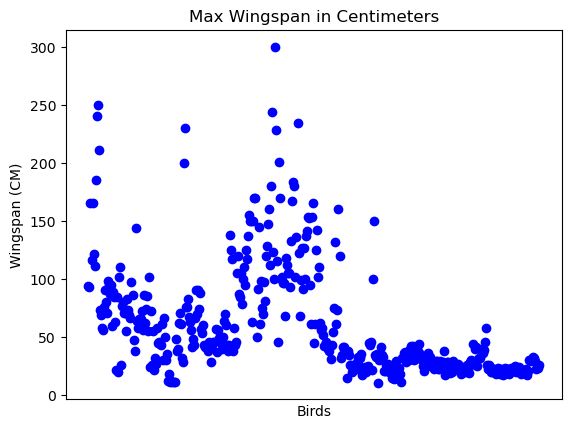

In [5]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    if birds['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, 'bo')
plt.show()

Al filtrar los valores atípicos, sus datos son ahora más coherentes y comprensibles.



Ahora que tenemos un conjunto de datos más limpio, al menos en lo que respecta a la envergadura, vamos a descubrir más cosas sobre estas aves.

Aunque los gráficos de líneas y de dispersión pueden mostrar información sobre los valores de los datos y sus distribuciones, queremos pensar en los valores inherentes a este conjunto de datos. Podrías crear visualizaciones para responder a las siguientes preguntas sobre la cantidad:

> ¿Cuántas categorías de aves hay y cuál es su número? ¿Cuántas aves están extinguidas, en peligro de extinción, son raras o comunes? ¿Cuántos hay de los distintos géneros y tipos en la terminología de Linneo?

Explorar los gráficos de barras
Los gráficos de barras son prácticos cuando se necesita mostrar agrupaciones de datos. Exploremos las categorías de aves que existen en este conjunto de datos para ver cuál es la más común por número.

En el archivo del cuaderno, crea un gráfico de barras básico

> ✅ Nota, puedes filtrar las dos aves atípicas que identificamos en la sección anterior, editar la errata de su envergadura, o déjalas para estos ejercicios que no dependen de los valores de envergadura.

Si desea crear un gráfico de barras, puede seleccionar los datos en los que desea centrarse. Los gráficos de barras se pueden crear a partir de datos sin procesar:

<Axes: title={'center': 'Birds of Minnesota'}, xlabel='Category'>

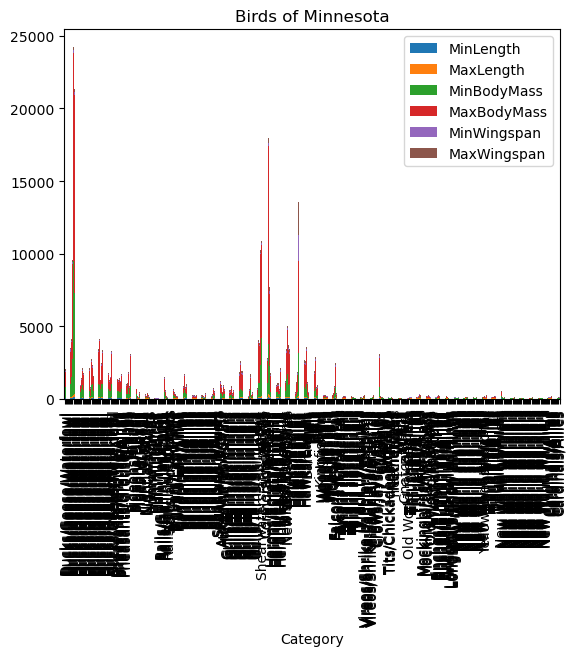

In [6]:
birds.plot(x='Category',
        kind='bar',
        stacked=True,
        title='Birds of Minnesota')


Este gráfico de barras, sin embargo, es ilegible porque hay demasiados datos no agrupados. Necesitas seleccionar sólo los datos que quieres graficar, así que veamos la longitud de las aves según su categoría.

Filtra tus datos para incluir sólo la categoría del pájaro.

> ✅ Observa que usas Pandas para manejar los datos, y luego dejas que Matplotlib haga el gráfico.

Como hay muchas categorías, puedes mostrar este gráfico verticalmente y ajustar su altura para tener en cuenta todos los datos:

<Axes: >

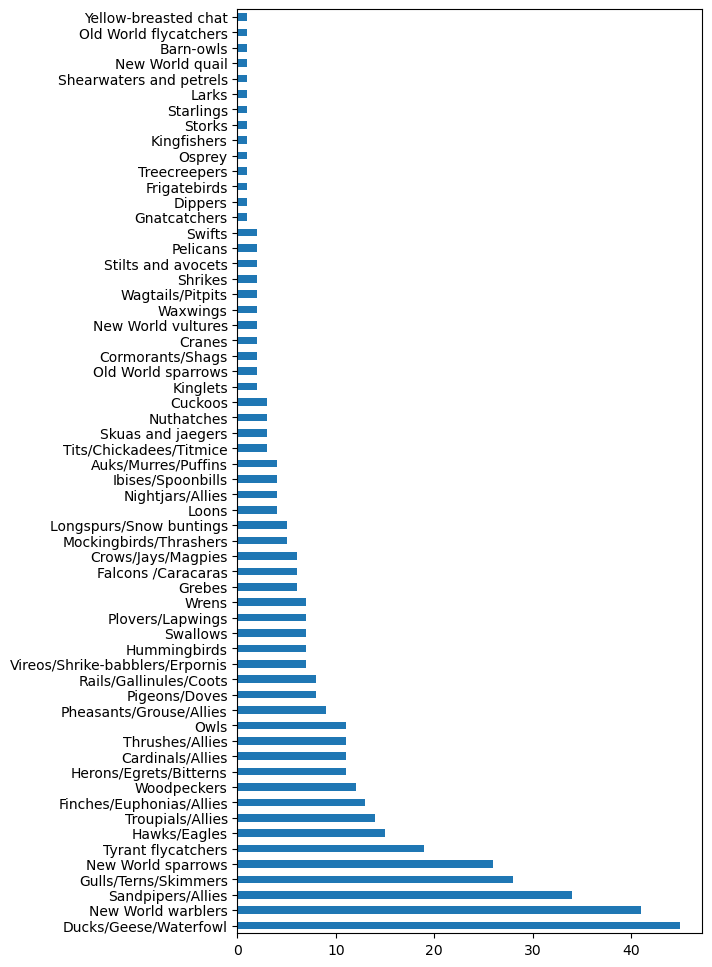

In [7]:
category_count = birds.value_counts(birds['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6, 12]
category_count.plot.barh()

Este gráfico de barras muestra una buena visión del número de aves en cada categoría. En un abrir y cerrar de ojos, se ve que el mayor número de aves de esta región se encuentra en la categoría de patos/gatos/aves acuáticas. Minnesota es el "país de los 10.000 lagos", así que no es de extrañar.

## Comparación de datos
Puedes probar diferentes comparaciones de datos agrupados creando nuevos ejes. Intenta una comparación de la longitud máxima de un pájaro, basada en su categoría:

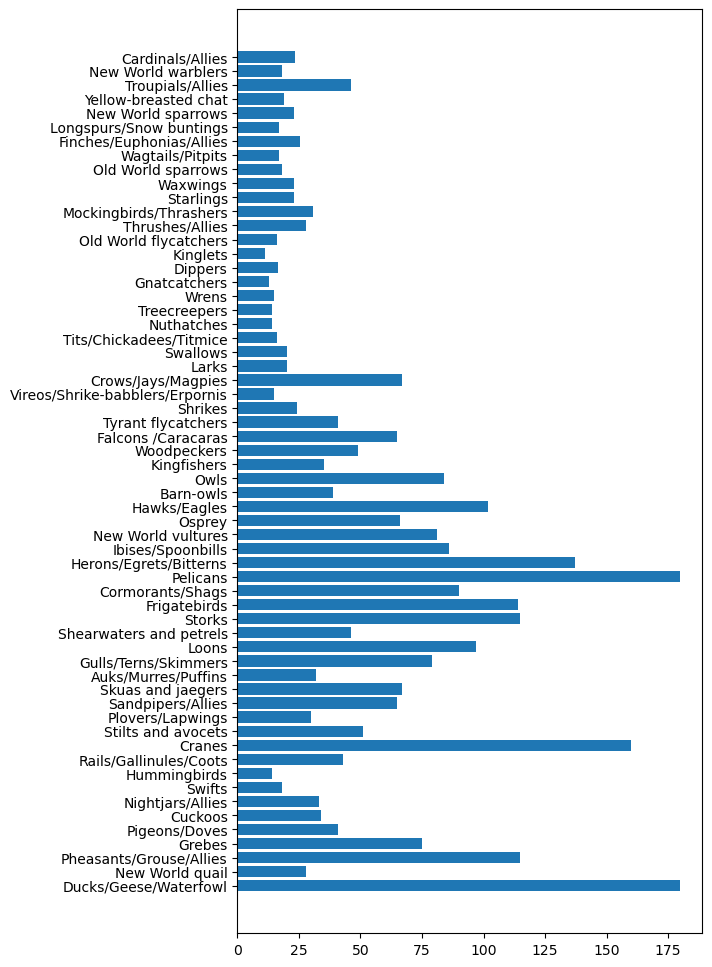

In [9]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Category'], width=maxlength)
plt.rcParams['figure.figsize'] = [6, 12]
plt.show()

Aquí no hay nada sorprendente: los colibríes tienen la menor longitud máxima en comparación con los pelícanos o los gansos. ¡Es bueno cuando los datos tienen un sentido lógico!

Puede crear visualizaciones más interesantes de los gráficos de barras superponiendo los datos. Superpongamos la longitud mínima y máxima en una categoría de aves determinada:

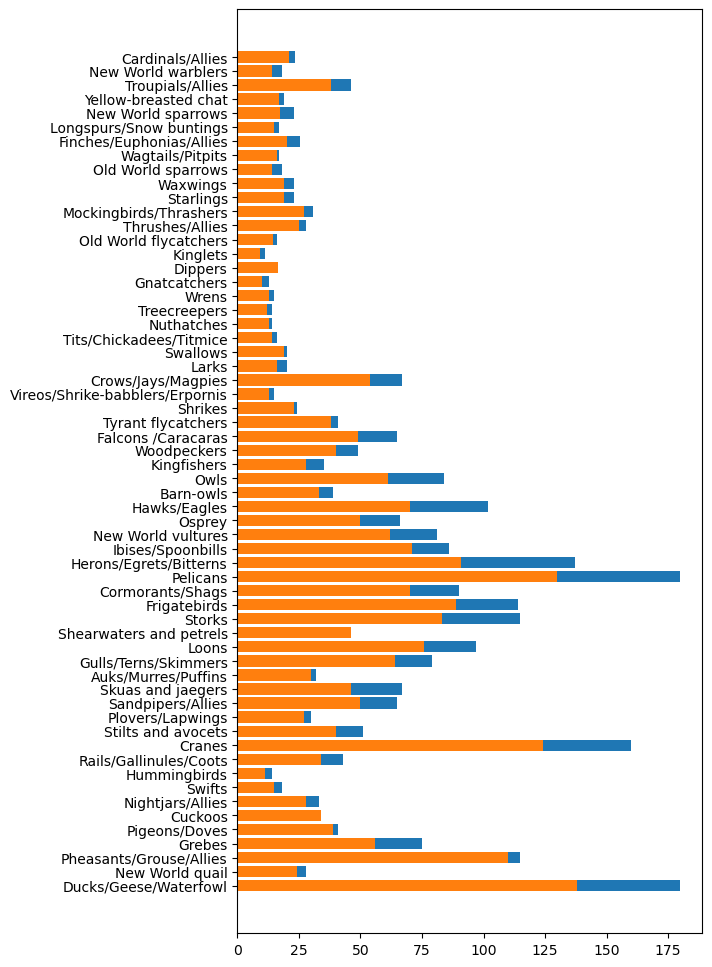

In [10]:
minLength = birds['MinLength']
maxLength = birds['MaxLength']
category = birds['Category']

plt.barh(category, maxLength)
plt.barh(category, minLength)

plt.show()

## Repaso y Autoestudio
Esta primera lección has recibido alguna información sobre cómo utilizar Matplotlib para visualizar cantidades. Investiga sobre otras formas de trabajar con conjuntos de datos para su visualización. [Plotly](https://github.com/plotly/plotly.py) es otra forma que no cubriremos en estas lecciones, así que echa un vistazo a lo que puede ofrecer.